In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
dataset_path = "C:/Users/rsers/Documents/dataset/Public Datasets/stroke-data-main.csv"
dataset = pd.read_csv(dataset_path)
print('Dataset shape:', dataset.shape)
dataset.head(5)

Dataset shape: (43400, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [47]:
# Data Exploration

# Rows containing duplicate data - Remove if required
dup_rows_df = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", dup_rows_df.shape)
print("-------------------------------------------------------------------------")
# Find null values
print('Null Values:\n\n', dataset.isnull().sum())
print("-------------------------------------------------------------------------")
print('Data Types:\n\n', dataset.dtypes)
print("-------------------------------------------------------------------------")

Number of duplicate rows:  (0, 12)
-------------------------------------------------------------------------
Null Values:

 id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64
-------------------------------------------------------------------------
Data Types:

 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
-------------------------------------------------------------------------


In [48]:
# Percentage of mising BMI and Smoking values
SmSt_mv = (dataset['smoking_status'].isnull().sum() / len(dataset['smoking_status'])*100)
print('Smoking Status missing values:', round(SmSt_mv, 1),'%')

# Percentage of missing values
SmSt_mv = (dataset['bmi'].isnull().sum() / len(dataset['bmi'])*100)
print('BMI missing values:', round(SmSt_mv, 1),'%')

Smoking Status missing values: 30.6 %
BMI missing values: 3.4 %


In [49]:
# Drop smoking status & impute missing BMI values (too many missing values to impute smoking status)
df = dataset.drop(['smoking_status'], 1)
print('Dataset shape:', df.shape)
df.head(5)

Dataset shape: (43400, 11)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,0


Distribution Plot


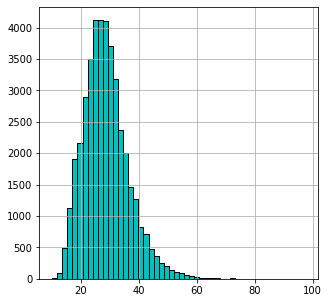

-------------------------------------------------------------------------
Box Plot


C:\Users\rsers\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

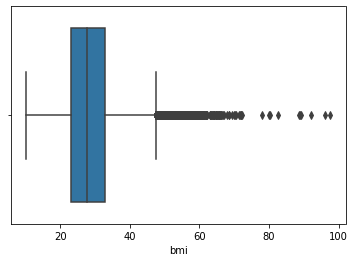

In [50]:
# Assess BMI column distribution - Create histograms & boxplot on BMI feature
print('Distribution Plot')
df['bmi'].hist(figsize=(5,5), bins = 50, color = "c", edgecolor='black')
plt.show()
print("-------------------------------------------------------------------------")
print('Box Plot')
sns.boxplot(dataset['bmi'])

In [51]:
# Due to the posetive skew in the data & many high BMI outliers that would negatively effect parametric imputation,
# Utilisation of the median shall be used for this numerical column (non-parametric)

# Impute missing BMI level rows with BMI median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Check the imputation of the dataset
print('Null Values:\n\n', df.isnull().sum())

Null Values:

 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64


In [52]:
# Convert categorical data into numerical data - Binary categorical fields were re-labelled as 0's and 1's &
# fields with more than 2 unique values were labelled with one hot encoding

# Binary/nominal variables - ever_married, Residence_type
# categorical - One hot variables - work_type, smoking_status, gender

# transform nominal variables that only have 2 values
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['ever_married']))}
print(class_mapping)
df['ever_married'] = df['ever_married'].map(class_mapping)

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Residence_type']))}
print(class_mapping)
df['Residence_type'] = df['Residence_type'].map(class_mapping)

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['gender']))}
print(class_mapping)
df['gender'] = df['gender'].map(class_mapping)

# transform nominal variables that have more than 2 values
df[['work_type']] = df[['work_type']].astype(str)

# concatenate nominal variables from pd.getdummies &
transpose = pd.get_dummies(df[['work_type']])

# And the ordinal variables to form the final dataset
df = pd.concat([df,transpose], axis=1)[['id','age','hypertension','heart_disease','ever_married','Residence_type',
                                        'avg_glucose_level','bmi','gender','work_type_Govt_job','work_type_Never_worked',
                                        'work_type_Private','work_type_children','work_type_Self-employed','stroke']]
df.head(5)

{'No': 0, 'Yes': 1}
{'Rural': 0, 'Urban': 1}
{'Female': 0, 'Male': 1, 'Other': 2}


,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_children,work_type_Self-employed,stroke
0,30669,3.0,0,0,0,0,95.12,18.0,1,0,0,0,1,0,0
1,30468,58.0,1,0,1,1,87.96,39.2,1,0,0,1,0,0,0
2,16523,8.0,0,0,0,1,110.89,17.6,0,0,0,1,0,0,0
3,56543,70.0,0,0,1,0,69.04,35.9,0,0,0,1,0,0,0
4,46136,14.0,0,0,0,0,161.28,19.1,1,0,1,0,0,0,0


C:\Users\rsers\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: 0, Score: 0.19988
Feature: 1, Score: 0.01512
Feature: 2, Score: 0.01615
Feature: 3, Score: 0.01198
Feature: 4, Score: 0.02400
Feature: 5, Score: 0.39712
Feature: 6, Score: 0.28889
Feature: 7, Score: 0.02246
Feature: 8, Score: 0.00651
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00833
Feature: 11, Score: 0.00035
Feature: 12, Score: 0.00920


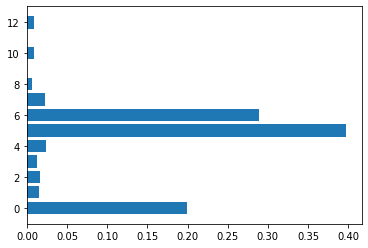

In [53]:
# Determine feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# Define label vector
y = df[['stroke']]

# Define feature array
X = df.drop(['id','stroke'], 1)

# Define random forest model
model = RandomForestClassifier(n_estimators = 100)
model.fit(X, y)

# Get importance
importance = model.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

In [54]:
# So, Age, Glucose level & BMI are the most significant features
# Consider dropping additional variables in future analyses

# Display label counts - The imbalanced data problem
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler

# Standardize data
ss = StandardScaler()

X = ss.fit_transform(X)

In [56]:
# Addressing the data imbalenced problem in the dataset
# Currently the ouput label 'stroke' has a 98.2:1.8 ratio of non-stroke:stroke events which will negatively bias
# any model trained using the dataset as is. Rebalancing the dataset must be performed before using the data to 
# train any models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# To address the imbalanced daatset problem we first over sample the minoirty class
from imblearn.over_sampling import RandomOverSampler

# Define scoring function
def classification_eval(y_test, y_pred):
    print(f'accuracy  = {np.round(accuracy_score(y_test, y_pred), 3)}')
    print(f'precision = {np.round(precision_score(y_test, y_pred), 3)}')
    print(f'recall    = {np.round(recall_score(y_test, y_pred), 3)}')
    print(f'f1-score  = {np.round(f1_score(y_test, y_pred), 3)}')
    print(f'roc auc   = {np.round(roc_auc_score(y_test, y_pred), 3)}')

# Instantiate oversampler 
rs = RandomOverSampler()

# Run model on dataset
X, y = rs.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

# Instantiate model
rf = RandomForestClassifier()

# Train model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Assess accuracy
classification_eval(y_test, y_pred)

C:\Users\rsers\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


accuracy  = 0.998
precision = 0.996
recall    = 1.0
f1-score  = 0.998
roc auc   = 0.998


In [57]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8503,   35],
       [   0, 8509]], dtype=int64)